In [118]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from scipy.cluster.vq import kmeans

def draw_one_picture_example():
    plt.imshow(digits.images[46],cmap='gray')
    plt.title('This is {}'.format(digits.target[i]))
    plt.show()
    
    
def get_labels(digits,centers,k):
    mas_distances=np.linalg.norm(digits-centers[0],axis=1).reshape(-1,1)
    for i in range(1,k,1):
        mas_distances=np.hstack([mas_distances,np.linalg.norm(digits-centers[i],axis=1).reshape(-1,1)])
    labels=np.argmin(mas_distances,axis=1)
    return labels

def find_prevalent_number_in_cluster(digits,labels,k):
    otv=[]
    for i in range(0,k,1):
        mask= (labels==i)
        arr = [digits.target[mask] ]
        u, indices = np.unique(arr, return_inverse=True)
        otv.append(u[np.argmax(np.bincount(indices))])
    return otv
        
    


labels are: [3 0 0 7 8 1 6 2 0 1 3 4 9 7 8 5 6 2 0 1]
clusters_to_numbers: [8, 9, 7, 0, 1, 5, 6, 3, 4, 2]


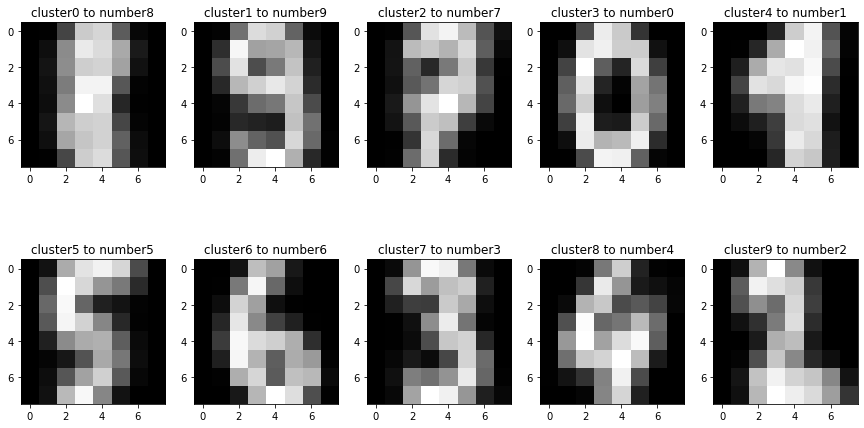

In [170]:
#task1 print numbers-centers of clusters
k=10
digits=load_digits()
digitsImages64=digits.images.reshape(digits.images.shape[0],64)

centers,delta =kmeans(digitsImages64,k)

labels=get_labels(digitsImages64,centers,k)
print("labels are:",labels[0:20:1])

clusters_to_numbers = find_prevalent_number_in_cluster(digits,labels,k)
print("clusters_to_numbers:",clusters_to_numbers)

plt.figure(figsize=(15,8))
for i in range(k):
    plt.subplot(2,5,i+1)
    plt.imshow(centers[i].reshape((8,8)),cmap='gray')
    plt.title("cluster{} to number{}".format(i,clusters_to_numbers[i]))
plt.show()

In [151]:
#task2 error rate
def wrong_predictions(digits,labels):
    otv=0
    for i in range(0,total,1):
        if (digits.target[i] != clusters_to_numbers[labels[i]]):
            otv=otv+1
    return otv

def error(true_number):
    confusions=0
    for i in range(0,total,1):
        if(digits.target[i]==true_number):
            if (digits.target[i] != clusters_to_numbers[labels[i]]):
                confusions+=1
    return confusions

total = digits.images.shape[0]
print("total=",total)
print("wrong_predictions=",wrong_predictions(digits,labels))
for i in range(0,k,1):
    print(i ,"was not recognized in " , error(i)/total)

total= 1797
wrong_predictions= 379
0 was not recognized in  0.0005564830272676684
1 was not recognized in  0.015581524763494713
2 was not recognized in  0.016138007790762382
3 was not recognized in  0.015581524763494713
4 was not recognized in  0.01001669449081803
5 was not recognized in  0.028937117417918753
6 was not recognized in  0.0022259321090706734
7 was not recognized in  0.0022259321090706734
8 was not recognized in  0.09682804674457429
9 was not recognized in  0.022815804117974403


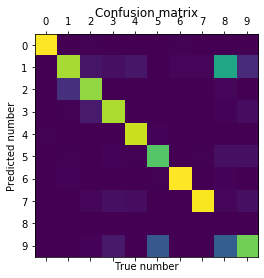

Из матрицы видно, что хуже всех предсказываются цифры 5,8 и 9 
Лучше всех- 1,6 и 7 


In [163]:
#task3 confusion matrix

def predicted_true(digits,labels,i,j):
    otv=0
    for k in range(0,total,1):
        if (clusters_to_numbers[labels[k]]==i and digits.target[k]==j):
            otv=otv+1
    return otv

a=np.zeros((10,10))
for i in range(0,10,1):
    for j in range(0,10,1):
        a[i][j]=predicted_true(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Confusion matrix")
plt.xlabel("True number")
plt.ylabel("Predicted number")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

print("Из матрицы видно, что хуже всех предсказываются цифры 5,8 и 9 ",end="\n")
print("Лучше всех- 1,6 и 7 ")

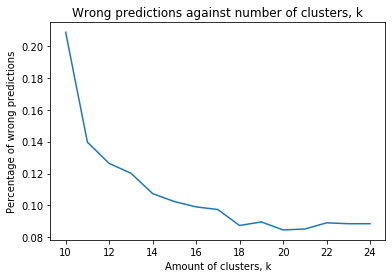

Количество ошибок близко к своему минимуму при k=18


In [193]:
#task4 graphic of error rate against k

mas_errors=[]
for k in range(10,25):
    centers,delta =kmeans(digitsImages64,k)
    labels=get_labels(digitsImages64,centers,k)
    clusters_to_numbers = find_prevalent_number_in_cluster(digits,labels,k)
    mas_errors.append(wrong_predictions(digits,labels)/total)
mas=np.arange(10,25)
#print(mas,mas_errors)
plt.plot(mas,mas_errors)
plt.title("Wrong predictions against number of clusters, k")
plt.xlabel("Amount of clusters, k")
plt.ylabel("Percentage of wrong predictions")
plt.show()

print("Количество ошибок близко к своему минимуму при k=18")

    

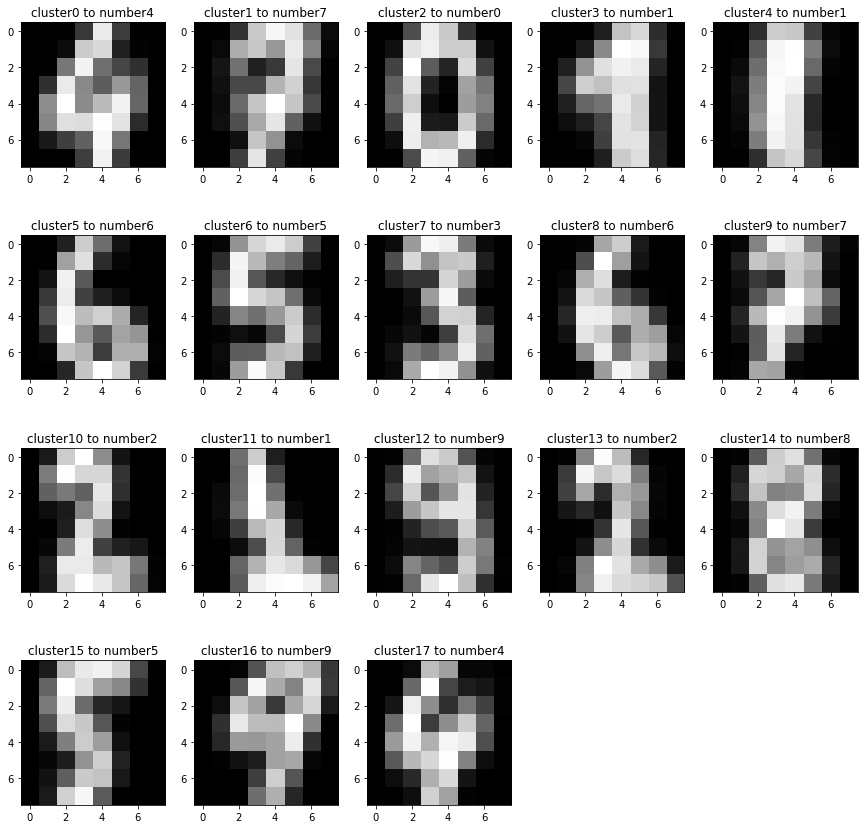

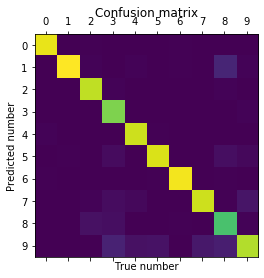

In [197]:
#task5 clasters and confusion matrix when k=18
k=18
centers,delta =kmeans(digitsImages64,k)
labels=get_labels(digitsImages64,centers,k)
clusters_to_numbers = find_prevalent_number_in_cluster(digits,labels,k)

plt.figure(figsize=(15,15))
for i in range(k):
    plt.subplot(4,5,i+1)
    plt.imshow(centers[i].reshape((8,8)),cmap='gray')
    plt.title("cluster{} to number{}".format(i,clusters_to_numbers[i]))
plt.show()

a=np.zeros((10,10))
for i in range(0,10,1):
    for j in range(0,10,1):
        a[i][j]=predicted_true(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Confusion matrix")
plt.xlabel("True number")
plt.ylabel("Predicted number")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()